## Zaprzyjaźniamy się z rozkładem normalnym

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from functools import partial

from scipy.stats import multivariate_normal, norm

#### Forma kwadratowa
$$\mathbf{x}^\text{T}\mathbf{A}\mathbf{x}$$
#### $D$-wymiarowy rozkład normalny
$$\displaystyle
p(\mathbf{x};\mathbf{\mu},\mathbf{\Sigma})= (2\pi)^{-\frac{D}{2}}|\mathbf{\Sigma}|^{-\frac{1}{2}}
\exp\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{\text{T}}\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})\right)
$$

Dla $D=1$: <br>
$$\displaystyle
p(x;\mu,\sigma^2)= \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2 \right]
$$

Dla $\mathbf{\mu} = \mathbf{0}$:
$$\begin{equation}
p(\mathbf{x};\mathbf{0},\mathbf{\Sigma})= (2\pi)^{-\frac{D}{2}}|\mathbf{\Sigma}|^{-\frac{1}{2}}
\exp\left(-\frac{1}{2}\mathbf{x}^{\text{T}}\mathbf{\Sigma}^{-1}\mathbf{x}\right) ,
\tag{3}
\end{equation}$$

#### Funkcja `mplot` to ogólne narzędzie do rysowania funkcji 2D

In [96]:
def quadratic_form(x, A):
    x1, x2 = x
    a, b, c, d = A.flatten()
    return a*x1**2 + d*x2**2 + (b+c)*x1*x2


def mnormal(x, A, loc=[0,0]):
    return multivariate_normal(loc, A).pdf(np.dstack([*x]))


def mplot(func, radius=4,
          resolution = 100,
          contours_density = 8,
          surf_density = 40,
          cmap=cm.cividis,
          loc=[0,0],
          figsize=(8,4),
          data=None,
         ):

    if data is not None:
        loc = np.mean(data, axis=0)
    locx, locy = loc
    x1_range = np.linspace(locx-radius, locx+radius, resolution)
    x2_range = np.linspace(locy-radius, locy+radius, resolution)
    X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
    Z_grid = func([X1_grid, X2_grid])

    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot(1, 2, 1)
    if data is not None:
        xdata, ydata = data.T
        ax.plot(xdata, ydata, '.', color='black', markersize=2, alpha=0.9)
    ax.contourf(X1_grid, X2_grid, Z_grid,
                    contours_density, cmap=cmap)
    c = ax.contour(X1_grid, X2_grid, Z_grid,
                    contours_density, colors='black')

    ax.set_xlabel(r'$x^{(1)}$', fontsize=14, labelpad=7)
    ax.set_ylabel(r'$x^{(2)}$', fontsize=14, rotation=0, labelpad=15)
    ax.set_aspect('equal')
    plt.clabel(c, inline=True, fontsize=10)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(X1_grid, X2_grid, Z_grid,
                    rcount=surf_density,
                    ccount=surf_density, cmap=cmap)
    ax.set_xlabel(r'$x^{(1)}$', fontsize=12)
    ax.set_ylabel(r'$x^{(2)}$', fontsize=12)

#### Symetryczną macierzą $\mathbf{A}$ można opisać kształt zarówno funkcji kwadratowej jak i rozkładu normalnego

ValueError: The input matrix must be symmetric positive semidefinite.

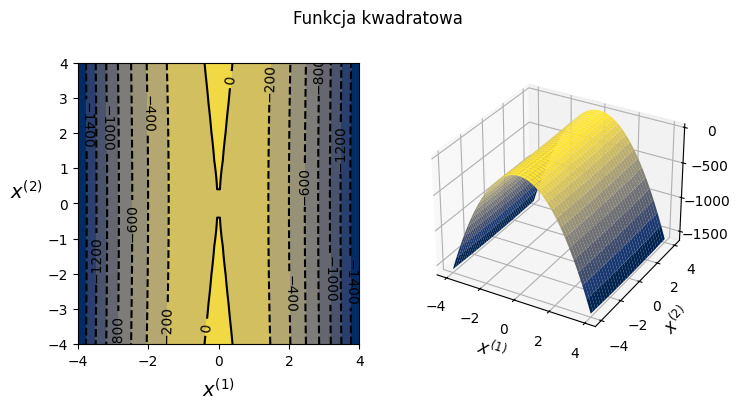

In [97]:
A = [[100, 0],
     [0, 1]]

mplot(func=partial(quadratic_form, A=np.array(A)))
plt.suptitle('Funkcja kwadratowa')
mplot(func=partial(mnormal, A=np.array(A)))
plt.suptitle('Funkcja Gaussa')
plt.tight_layout()

## Estymacja parametrów rozkładu normalnego $\mu$ i $\sigma$

Prawdziwe wartości parametrów

In [ ]:
mu, sigma = 25, 16

**Generowanie próbek z jednowymiarowego rozkładu normalnego**

In [ ]:
n_samples = 100

rv = norm(loc=mu, scale=sigma)
xdata = rv.rvs(n_samples)

x = np.linspace(mu-4*sigma, mu+4*sigma, num=300)
plt.figure(figsize=(5,3))
plt.plot(x, rv.pdf(x), color='tab:orange')
plt.plot(xdata, np.zeros_like(xdata), 'o', color='black', alpha=0.3)
plt.xlabel('x')
plt.show()

Przegląd zupełny (ang. *grid search*) wartości parametrów

In [ ]:
# siatka (ang. grid) poszukiwań
step = 4
mu_grid, sigma_grid = np.mgrid[mu-step:mu+step:0.1, sigma-step:sigma+step:0.1]

# LLE (ang. Log LikElihood)
# Liczymy wartość LLE dla każdej konfiguracji wartości parametrów, jaka jest w siatce poszukiwań
LLE = np.empty(mu_grid.shape)
for i in range(LLE.shape[0]):
    for j in range(LLE.shape[1]):
        LLE[i,j] = np.sum(norm.logpdf(xdata, loc=mu_grid[i,j], scale=sigma_grid[i,j]))

# wykres funkcji wiarygodności LLE
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(9,4))

ax = fig.add_subplot(1, 2, 1)
ax.contourf(mu_grid, sigma_grid, LLE, 12, alpha=.8, cmap='viridis')
c = ax.contour(mu_grid, sigma_grid, LLE, 12, colors='black')
ax.set_xlabel('$\mu$', fontsize=14)
ax.set_ylabel('$\sigma$', fontsize=14)
ax.set_aspect('equal')
plt.clabel(c, inline=True, fontsize=10)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(mu_grid, sigma_grid, LLE, rcount=50, ccount=50, cmap='viridis')
ax.set_xlabel('$\mu$', fontsize=14)
ax.set_ylabel('$\sigma$', fontsize=14)
plt.suptitle('Funkcja wiarygodności')
plt.tight_layout()
plt.show()